# 1. 선형 회귀 & 오차역전파 실습

### 1) 넘파이로 짜는 선형회귀 & 오차역전파

 - 기울기 w에 대한 편미분

 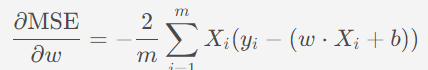


  - 기울기 b 에 대한 편미분

  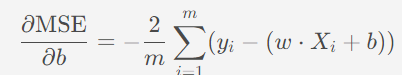

In [1]:
import numpy as np

X = np.array([1,2,3,4,5])
y = np.array([60,70,80,90,100])

# 평균 계산을 위한 데이터 갯수를 미리 구함

m = len(X) # 학생수

# 파라미터 초기화
w =0
b= 0

learning_rate = 0.01 # 경사하강법에서 접선의 기울기에 곱하는 값
epochs = 100 # 학습 횟수

for epoch in range(epochs):
    # 선형 모델
    # [0,0,0,0,0] = 0 * [1,2,3,4,5] + 0
    y_pred = w * X + b

    # Mean Squared Error
                    #([60, 70, 80, 90, 100] - [0,0,0,0])**2 = [3600, 4900, 6400, 8100, 10000]
    cost = (1/m) * sum(( y- y_pred)**2)


    # 기울기 계산
    dw = (2/m) * sum(X * (y_pred - y)) #가중치에 대한 편미분
    db = (2/m) * sum(y_pred - y)       # 편향에 대한 편미분

    # 경사하강법 수행
    w = w - learning_rate * dw
    b = b - learning_rate * db

    # 매 10회마다 print
    if epoch % 10 == 0:
        print(f'Epoch: {epoch}, Cost: {cost}, w: {w}, b: {b}')

# 학습이 끝난 후 최종 가중치와 절편 출력
print(f'\n최종 가중치와 절편 값은 : w = {w:.4f}, b = {b:.4f}')

# 모델 예측
y_pred = w * X + b
print(f'예측값: {y_pred}')

Epoch: 0, Cost: 6600.0, w: 5.2, b: 1.6
Epoch: 10, Cost: 355.5165661002577, w: 20.56917474873216, b: 7.4244543438260715
Epoch: 20, Cost: 305.9810204458919, w: 21.239393758347937, b: 9.125338164664088
Epoch: 30, Cost: 285.8235020136723, w: 20.933820573390687, b: 10.505485813944661
Epoch: 40, Cost: 267.1041560640602, w: 20.574342985129963, b: 11.821925650064449
Epoch: 50, Cost: 249.61128825285925, w: 20.222529335147474, b: 13.09333538797396
Epoch: 60, Cost: 233.2640447916494, w: 19.882141590286498, b: 14.322327215764401
Epoch: 70, Cost: 217.98739542571047, w: 19.553069251207745, b: 15.510388423625912
Epoch: 80, Cost: 203.71122607832316, w: 19.234953661294117, b: 16.65888702044243
Epoch: 90, Cost: 190.370014510661, w: 18.927431181984115, b: 17.76914077262414

최종 가중치와 절편 값은 : w = 18.6594, b = 18.7367
예측값: [ 37.39614963  56.05557597  74.71500231  93.37442865 112.03385499]


### 2) 캘리포니아 주택 가격 데이터 셋을 이용한 선형 회귀

### 사이킷런에서 제공해주는 캘리포니아 주택 가격 데이터셋 컬럼 리스트

#### 1. X값 (feature)

- MedInc (Median Income): 중간 소득 (단위: 10,000 달러)

- HouseAge (Housing Median Age): 주택 중간 연령

- AveRooms (Average Rooms per Household): 가구당 평균 방 개수.

- AveBedrms (Average Bedrooms per Household): 가구당 평균 침실 개수.

- Population: 해당 지역의 인구 수

- AveOccup (Average Occupancy per Household): 가구당 평균 거주자 수.

- Latitude: 해당 지역의 위도

- Longitude: 해당 지역의 경도

#### 2. y값 (target)

- MedHouseVal (Median House Value): 주택 중간 가격 (단위: 10,000 달러)

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# 데이터셋 로드
california = fetch_california_housing()

california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
# 데이터를 데이터프레임으로 변환
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['Target'] = california.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


##### 알게된점
- 1) StandardScaler는 각 특성(feature)이 2차원 배열로 주어져야 제대로 작동합니다.
- fit_transform과 transform 메서드는 2차원 배열을 입력으로 받아야 합니다.
- 그러나 X는 1차원 배열로 되어 있으므로, reshape(-1, 1)을 사용하여 2차원 배열로 변환한 후 정규화를 수행합니다. 이후, flatten() 메서드를 사용하여 다시 1차원 배열로 변환합니다.

- 1차원 배열로 다시 변환하는 이유
정규화 작업 후에는 결과를 다시 1차원 배열로 변환하는 이유는 원래 데이터의 형태로 복원하기 위해서입니다.

In [8]:
X = california.data[:,0] # 중간 소득만(MedInc) X 값으로 사용
y = california.target #주택 가격(MedHouseVal) y 값

X_train, X_valid ,y_train, y_valid = train_test_split(X,y,test_size=0.2,random_state=42)

# 데이터 정규화
scaler = StandardScaler()

                              # scaler에 2차원으로 줘서 변환후 1차원으로 원상 복귀
X_train = scaler.fit_transform(X_train.reshape(-1,1)).flatten()
                           # scaler에 2차원으로 줘서 변환후 1차원으로 원상 복귀
X_valid = scaler.transform(X_valid.reshape(-1,1)).flatten()

# 파라미터 초기화
w = 0
b = 0

# 학습률, 반복 횟수
learning_rate = 0.01
epochs = 100

# 평균을 위한 갯수 측정
m = len(X_train)

# 경사 하강법을 통한 학습
for epoch in range(epochs):
    # 선형 모델
            # 예측값 = 0 * 중간소득 + 0
    y_pred = w * X_train + b

    # Mean Squared Error
                    # (주택가격 정답 - 예측값 ) ^2를 모든데이터에 대해서 구한다음에 합하고 m으로 나눔
    cost = (1/m) * sum((y_train - y_pred)**2)

    # 기울기 계산
    dw = -(2/m) * sum(X_train * (y_train - y_pred)) # w에 대한 편미분
    db = -(2/m) * sum(y_train - y_pred)             # b에 대한 편미분

    # 파라미터 업데이터
    w = w - learning_rate * dw
    b = b - learning_rate * db

    # 매 10회마다 print
    if epoch % 10 == 0:
        print(f'Epoch: {epoch}, Cost: {cost}, w: {w}, b: {b}')

# 학습된 모델을 테스트 데이터에 적용하여 예측
y_pred_valid = w * X_valid + b

# 테스트 결과 출력
print("\n평가 데이터 셋 예측:")
print(y_pred_valid)

# 실제값과 비교
print("\n정답 값:")
print(y_valid)

# MSE 계산
mse_valid = (1/len(y_valid)) * sum((y_valid - y_pred_valid)**2)
print(f"\n평가 데이터 셋 Mean Squared Error: {mse_valid:.4f}")

# R2 Score 계산
r2 = r2_score(y_valid, y_pred_valid)
print(f"평가 데이터 셋 R2 Score: {r2:.4f}")

# RMSE 계산
rmse_valid = np.sqrt(mse_valid)
print(f"평가 데이터 셋 Root Mean Squared Error: {rmse_valid:.4f}")

# MAE 계산
mae_valid = mean_absolute_error(y_valid, y_pred_valid)
print(f"평가 데이터 셋 Mean Absolute Error: {mae_valid:.4f}")

Epoch: 0, Cost: 5.629742323103177, w: 0.01597039128852067, b: 0.04143893874757708
Epoch: 10, Cost: 3.9908509843571127, w: 0.15911991500303702, b: 0.41287406752958544
Epoch: 20, Cost: 2.8967140617698983, w: 0.27608349814907274, b: 0.7163636107801387
Epoch: 30, Cost: 2.166259530059075, w: 0.3716512613338289, b: 0.9643366637448874
Epoch: 40, Cost: 1.6786022616843066, w: 0.4497370818471621, b: 1.1669487021632685
Epoch: 50, Cost: 1.3530383818329856, w: 0.5135388823921085, b: 1.332497489102983
Epoch: 60, Cost: 1.1356893403287411, w: 0.5656695986478473, b: 1.4677629011246445
Epoch: 70, Cost: 0.9905853875671632, w: 0.6082641893039821, b: 1.578284590999984
Epoch: 80, Cost: 0.8937128319703707, w: 0.6430670710496162, b: 1.6685888583683823
Epoch: 90, Cost: 0.8290399416096595, w: 0.6715035593252967, b: 1.7423740195810031

평가 데이터 셋 예측:
[0.99713116 1.30633464 1.65143788 ... 3.74275332 1.39861193 1.67762615]

정답 값:
[0.477   0.458   5.00001 ... 5.00001 0.723   1.515  ]

평가 데이터 셋 Mean Squared Error: 0.7

### 와인 데이터 선형회귀

#### 와인 데이터셋 feature 설명

- fixed acidity: 고정 산도
- volatile acidity: 휘발성 산도
- citric acid: 구연산
- residual sugar: 잔류 당분
- chlorides: 염화물
- free sulfur dioxide: 유리 이산화황
- total sulfur dioxide: 총 이산화황
- density: 밀도
- pH: 수소 이온 농도 (산성도)
- sulphates: 황산염
- alcohol: 알코올 도수
- quality: 품질 (와인의 품질 등급)
- class: 클래스 (와인의 종류 또는 품종)

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 와인 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/대구은행/1. 회귀교안_09_02/wine.csv')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [11]:
X = data['residual sugar'].values # 잔류 당분을 X로
y = data['alcohol'].values # 와인의 알콜을 종속 변수로 선택

# 데이터를 train 세트와 valid 세트로 나누기
X_train , X_valid , y_train, y_valid = train_test_split(X,y,test_size=0.2,random_state=42)

# 데이터 정규화
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.reshape(-1,1)).flatten()
X_valid = scaler.transform(X_valid.reshape(-1,1)).flatten()

# 파라미터 초기화
w = 0
b = 0

# 학습률, 반복 횟수
learning_rate = 0.01
epochs = 100

# 평균을 위한 갯수 측정
m = len(X_train)


# 경사 하강법을 통한 학습
for epoch in range(epochs):
    # 선형 모델
    y_pred = w * X_train + b

    # Mean Squared Error
    cost  = (1/m) * sum((y_train - y_pred)**2) # 정답값 - 예측값

    # 기울기 계산
    dw = -(2/m) * sum(X_train * (y_train - y_pred)) # w에 대한 편미분
    db = -(2/m) * sum(y_train - y_pred)             # b에 대한 편미분

    # 파라미터 업데이트
    w = w - learning_rate * dw
    b = b - learning_rate * db

    # 매 10회마다 print

    if epoch % 10 == 0:
        print(f'Epoch: {epoch + 1}, Cost: {cost : .4f}, w: {w : .4f}, b: {b: .4f}')

# 학습된 모델을 테스트 데이터에 적용하여 예측
y_pred_valid = w * X_valid + b

# 테스트 결과 출력
print("\n평가 데이터 셋 예측:")
print(y_pred_valid)

# 실제값과 비교
print("\n정답 값:")
print(y_valid)

# MSE 계산
mae_valid = mean_absolute_error(y_valid, y_pred_valid)
print(f"평가 데이터 셋 Mean Absolute Error: {mae_valid:.4f}")

# R2 Score 계산
r2

Epoch: 1, Cost:  111.3250, w: -0.0087, b:  0.2097
Epoch: 11, Cost:  74.7301, w: -0.0868, b:  2.0891
Epoch: 21, Cost:  50.2991, w: -0.1506, b:  3.6246
Epoch: 31, Cost:  33.9887, w: -0.2027, b:  4.8793
Epoch: 41, Cost:  23.0998, w: -0.2453, b:  5.9045
Epoch: 51, Cost:  15.8303, w: -0.2801, b:  6.7421
Epoch: 61, Cost:  10.9771, w: -0.3085, b:  7.4266
Epoch: 71, Cost:  7.7370, w: -0.3317, b:  7.9858
Epoch: 81, Cost:  5.5739, w: -0.3507, b:  8.4427
Epoch: 91, Cost:  4.1299, w: -0.3662, b:  8.8160

평가 데이터 셋 예측:
[8.51607171 9.35095606 8.94139015 ... 9.38246113 8.760236   8.30341248]

정답 값:
[12.2  9.9 12.  ... 12.4  9.4  8.7]
평가 데이터 셋 Mean Absolute Error: 1.4509


0.39444450250374163